In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_X_train = pd.read_csv('/content/drive/My Drive/PhalangesOutlinesCorrect/X_train_sample2.csv')
df_y_train = pd.read_csv('/content/drive/My Drive/PhalangesOutlinesCorrect/y_train_sample2.csv')
df_X_test = pd.read_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/X_test_original.csv')
df_y_test = pd.read_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/y_test_original.csv')

In [4]:
# 데이터 전처리
X_train = df_X_train.values
y_train = df_y_train.values.reshape(-1)   # 1차원 배열(벡터)로 변환
X_test = df_X_test.values
y_test = df_y_test.values.reshape(-1)   # 1차원 배열(벡터)로 변환


In [5]:
def knn_model(X_train, y_train, X_test, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def logistic_regression_model(X_train, y_train, X_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def cart_model(X_train, y_train, X_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model.predict(X_test)

def xgboost_model(X_train, y_train, X_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    return model.predict(X_test)

def lstm_model(X_train, y_train, X_test):
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

    return (model.predict(X_test_reshaped) > 0.5).astype(int).flatten()

def cnn_model(X_train, y_train, X_test):
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

    return (model.predict(X_test_reshaped) > 0.5).astype(int).flatten()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Logistic Regression 모델 성능:
모델 성능 평가:
정확도: 0.6154
F1-Score: 0.7612
Recall: 1.0000
specificity: 0.0060
혼동 행렬 (Confusion Matrix):
[[  2 330]
 [  0 526]]


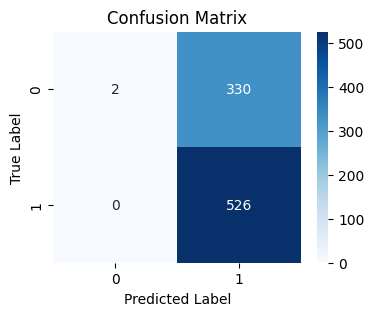

CART 모델 성능:
모델 성능 평가:
정확도: 0.6200
F1-Score: 0.7413
Recall: 0.8878
specificity: 0.1958
혼동 행렬 (Confusion Matrix):
[[ 65 267]
 [ 59 467]]


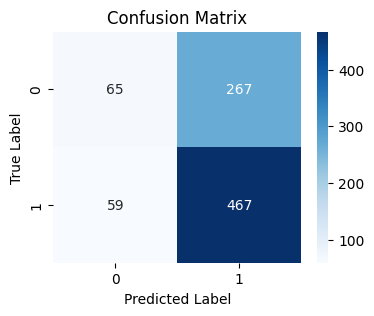

KNN 모델 성능:
모델 성능 평가:
정확도: 0.6247
F1-Score: 0.7646
Recall: 0.9943
specificity: 0.0392
혼동 행렬 (Confusion Matrix):
[[ 13 319]
 [  3 523]]


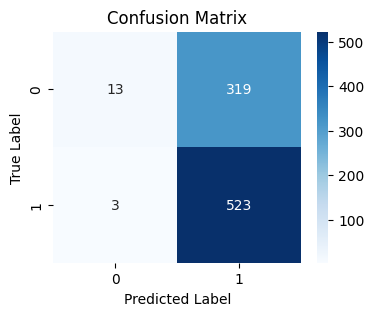

XGBoost 모델 성능:
모델 성능 평가:
정확도: 0.6166
F1-Score: 0.7611
Recall: 0.9962
specificity: 0.0151
혼동 행렬 (Confusion Matrix):
[[  5 327]
 [  2 524]]


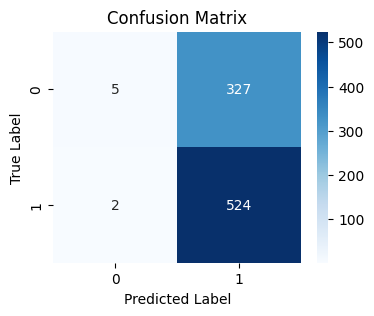

LSTM 모델 성능:
모델 성능 평가:
정확도: 0.6131
F1-Score: 0.7601
Recall: 1.0000
specificity: 0.0000
혼동 행렬 (Confusion Matrix):
[[  0 332]
 [  0 526]]


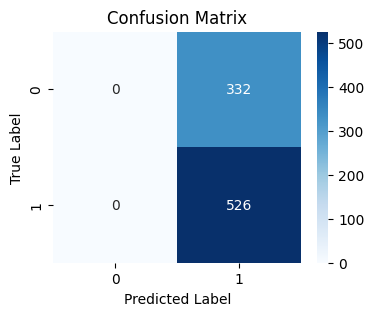

CNN 모델 성능:
모델 성능 평가:
정확도: 0.6154
F1-Score: 0.7612
Recall: 1.0000
specificity: 0.0060
혼동 행렬 (Confusion Matrix):
[[  2 330]
 [  0 526]]


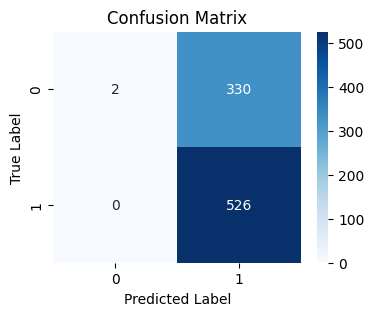

In [6]:
# 모델 선택 및 예측
# 모델 선택 및 예측
models = {
    "Logistic Regression": logistic_regression_model(X_train, y_train, X_test),
    "CART": cart_model(X_train, y_train, X_test),
    "KNN": knn_model(X_train, y_train, X_test),
    "XGBoost": xgboost_model(X_train, y_train, X_test),
    "LSTM": lstm_model(X_train, y_train, X_test),
    "CNN": cnn_model(X_train, y_train, X_test),

}
results = []
# 성능 평가 및 출력
for model_name, pred_y in models.items():
    accuracy = accuracy_score(y_test, pred_y)
    recall = recall_score(y_test, pred_y)
    f1 = f1_score(y_test, pred_y)
    specificity = specificity_score(y_test, pred_y)
    conf_matrix = confusion_matrix(y_test, pred_y)
    results.append([accuracy, f1, recall, specificity, conf_matrix])

    # 성능 지표 출력
    print(f"{model_name} 모델 성능:")
    print("모델 성능 평가:")
    print(f"정확도: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"specificity: {specificity:.4f}")
    print("혼동 행렬 (Confusion Matrix):")
    print(conf_matrix)

    # Confusion Matrix
    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_test, pred_y)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
# 성능 지표를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=["Accuracy", "F1", "Recall", "Specificity", "Confusion Matrix"], index=models.keys())
model_results = results_df.T
# 결과를 출력
print("\n모델 성능 비교 결과:")
print(model_results)

# 결과를 CSV 파일로 저장
model_results.to_csv("/content/drive/My Drive/PhalangesOutlinesCorrect/results/증강안함_models_result.csv")


모델 성능 비교 결과:
                   Logistic Regression                    CART  \
Accuracy                      0.615385                0.620047   
F1                            0.761216                 0.74127   
Recall                             1.0                0.887833   
Specificity                   0.006024                0.195783   
Confusion Matrix  [[2, 330], [0, 526]]  [[65, 267], [59, 467]]   

                                    KNN               XGBoost  \
Accuracy                       0.624709               0.61655   
F1                              0.76462              0.761075   
Recall                         0.994297              0.996198   
Specificity                    0.039157               0.01506   
Confusion Matrix  [[13, 319], [3, 523]]  [[5, 327], [2, 524]]   

                                  LSTM                   CNN  
Accuracy                      0.613054              0.615385  
F1                            0.760116              0.761216  
Recall   